# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load dataset

In [2]:
car_data = pd.read_csv('dataset/car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data profiling

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(car_data, title='Car Price Data Report')

In [4]:
profile.to_file('Car_Price_Data_Report.html')

# EDA (Exploratory Data Analysis)

In [5]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

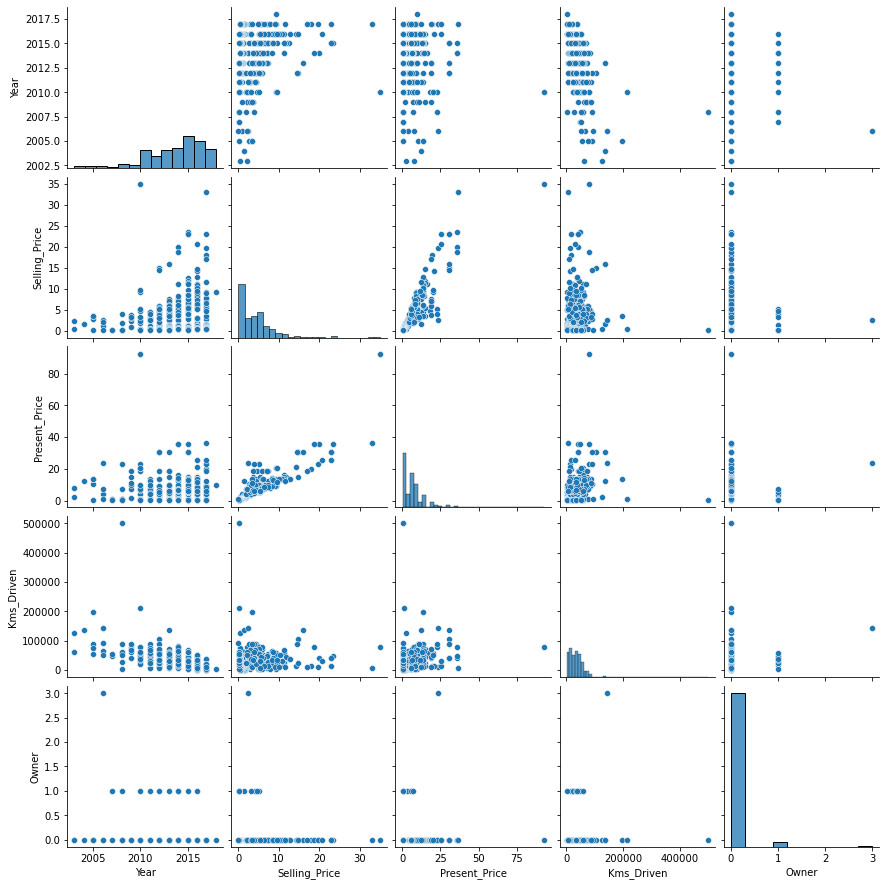

In [8]:
sns.pairplot(car_data)

<AxesSubplot:>

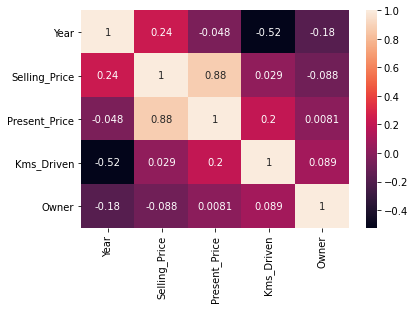

In [9]:
sns.heatmap(car_data.corr(), annot=True)

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

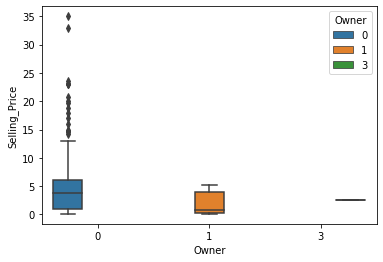

In [10]:
sns.boxplot(x='Owner', y='Selling_Price', hue='Owner', data=car_data)

In [11]:
car_data = car_data[car_data['Selling_Price'] < 13]

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

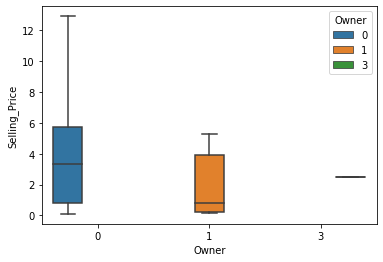

In [12]:
sns.boxplot(x='Owner', y='Selling_Price', hue='Owner', data=car_data)

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

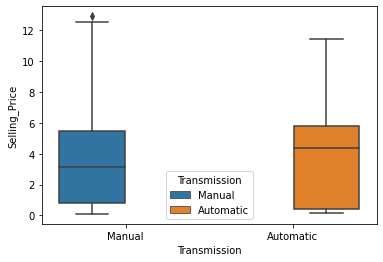

In [13]:
sns.boxplot(x='Transmission', y='Selling_Price', hue='Transmission', data=car_data)

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

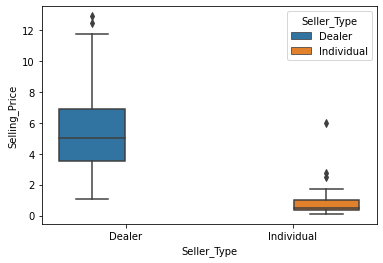

In [14]:
sns.boxplot(x='Seller_Type', y='Selling_Price', hue='Seller_Type', data=car_data)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

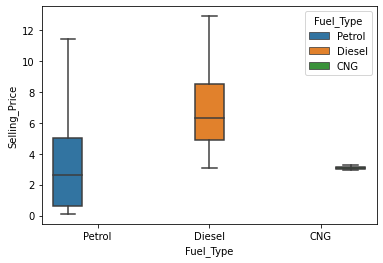

In [15]:
sns.boxplot(x='Fuel_Type', y='Selling_Price', hue='Fuel_Type', data=car_data)

In [16]:
final_car_data = car_data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [17]:
final_car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Converting year into Number of years

In [18]:
final_car_data['Current_Year'] = 2021

In [19]:
final_car_data['Number_Of_Years'] = final_car_data['Current_Year'] - final_car_data['Year']

In [20]:
final_car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number_Of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [21]:
final_car_data.drop(['Year', 'Current_Year'], axis=1, inplace=True)

In [22]:
final_car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


### Converting categorical data into numerical data using encoding

In [23]:
final_car_data = pd.get_dummies(final_car_data, drop_first=True)

In [24]:
final_car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


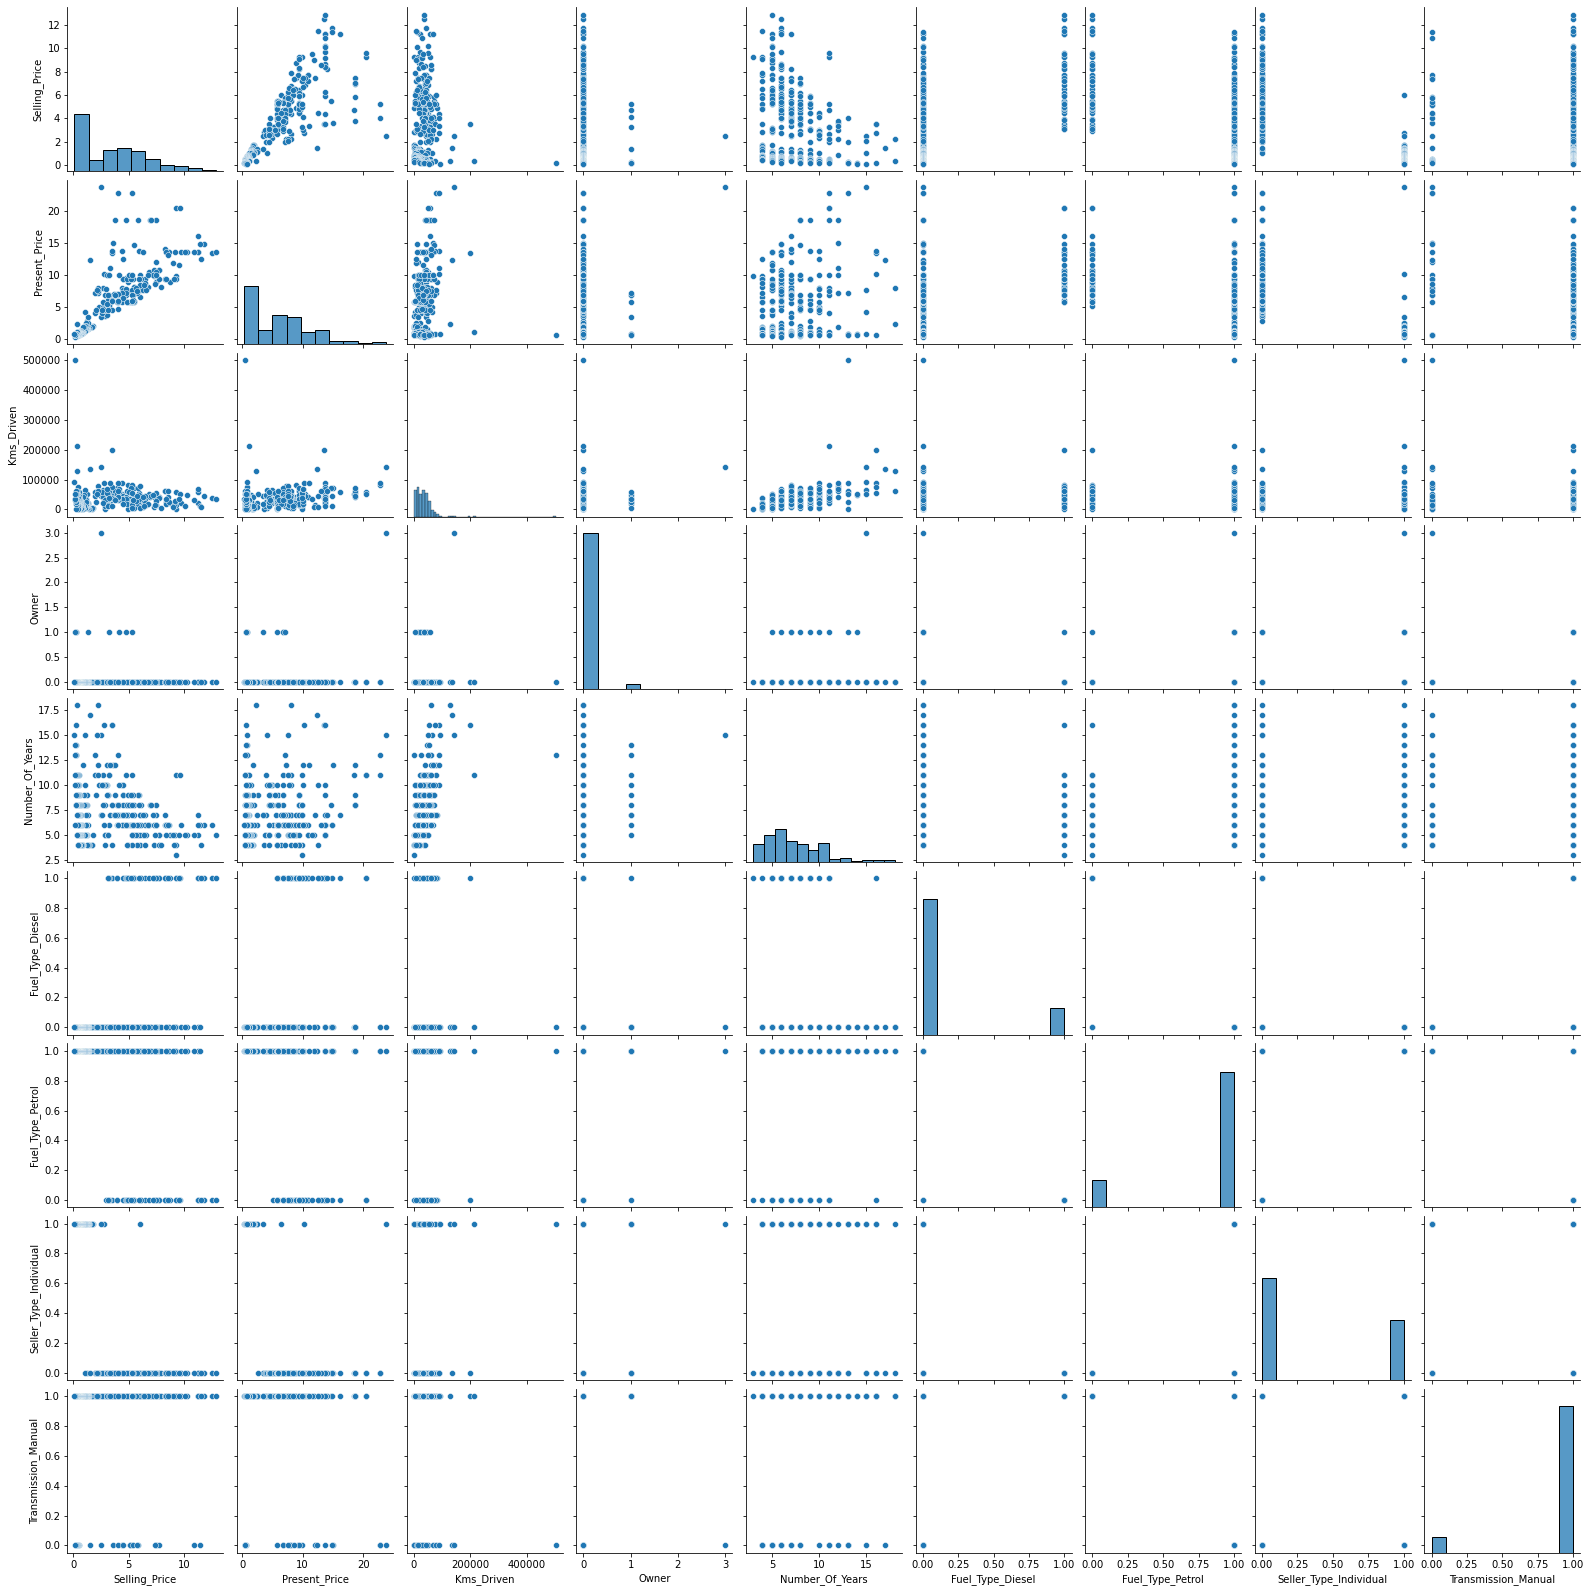

In [25]:
sns.pairplot(final_car_data)

In [26]:
final_car_data.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Number_Of_Years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

# Dividing data into features and target columns

In [27]:
X = final_car_data[['Present_Price', 'Kms_Driven', 'Owner',
       'Number_Of_Years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual']]
y = final_car_data['Selling_Price']

### Maximum and Minimum Selling Price

In [28]:
print("Maximum Selling Price: ", max(y))
print("Minimum Selling Price: ", min(y))

Maximum Selling Price:  12.9
Minimum Selling Price:  0.1


# Split data into train and test

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a model using Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
ran_for_model = RandomForestRegressor()
ran_for_model.fit(X_train, y_train)

RandomForestRegressor()

# Predict from the model

In [31]:
y_pred = ran_for_model.predict(X_test)

In [32]:
y_pred

array([ 7.208 ,  3.842 ,  0.327 ,  4.7665,  3.994 ,  6.272 ,  5.2565,
        0.258 ,  2.471 ,  4.1611,  2.9715,  9.2695,  0.487 ,  0.3499,
        7.6485,  5.0415,  7.5356,  0.5844,  0.4469,  6.819 ,  0.7361,
        4.334 ,  5.8438,  8.5645,  5.4295,  1.151 ,  8.161 ,  7.275 ,
       10.666 ,  1.003 ,  4.4235,  0.48  ,  0.2612,  6.7508,  4.2811,
        2.9635,  6.2951,  7.524 ,  0.1925,  2.6955,  3.429 ,  3.2011,
        2.546 ,  0.6034,  5.8235,  4.6467,  4.6895,  4.282 ,  1.0628,
        2.8165,  7.4   ,  0.1908,  1.2346,  6.81  ,  0.6072,  3.0759,
        9.9275,  7.3515,  2.9195,  1.5396,  0.5743,  0.6277,  4.0327,
        3.1856,  0.465 ,  0.4619,  7.8355,  2.748 ,  1.1243,  1.1775,
        7.5405,  0.6635,  2.999 ,  3.3503,  0.6007,  5.142 ,  0.3912,
        0.7542,  2.953 ,  5.3886,  3.469 ,  0.626 ,  4.128 ,  1.6135,
        0.4341,  4.6875])

# Performance measure of the model

D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

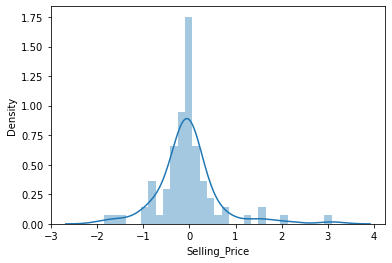

In [33]:
sns.distplot((y_test - y_pred))

In [34]:
from sklearn import metrics

def performance_measure(true, predict):
    mae = metrics.mean_absolute_error(true, predict)
    mse = metrics.mean_squared_error(true, predict)
    rmse = np.sqrt(mse)
    r2_score = metrics.r2_score(true, predict)
    print('===============================================')
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Score:', r2_score)
    print('===============================================')

In [35]:
performance_measure(y_test, y_pred)

MAE: 0.40525232558139596
MSE: 0.45473449500000035
RMSE: 0.6743400440430631
R2 Score: 0.946314747502724


In [36]:
from sklearn.model_selection import cross_val_score

def cv_score(model, X, y):
    pred = cross_val_score(model, X, y, cv=10)
    print(pred)
    print('===============================================')
    print('Cross Validation Score:', pred.mean())
    print('===============================================')

### Cross Validation Score for all the data

In [37]:
cv_score(ran_for_model, X, y)

[ 0.90047395  0.89843695  0.63761312 -3.22466493 -2.77897114 -0.61843093
  0.97227693  0.86284532  0.87742528  0.86066923]
Cross Validation Score: -0.061232621886566405


### Cross Validation Score for the train data

In [38]:
cv_score(ran_for_model, X_train, y_train)

[0.95849986 0.95080072 0.9614197  0.96583422 0.95957248 0.89799929
 0.93777377 0.96201194 0.80599157 0.95040131]
Cross Validation Score: 0.935030485930868


### Cross Validation Score for the test data

In [39]:
cv_score(ran_for_model, X_test, y_test)

[0.91243976 0.97209448 0.79795621 0.9749227  0.77464247 0.87778241
 0.9245089  0.92464804 0.79879125 0.96236644]
Cross Validation Score: 0.8920152653964919
